In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.dtypes

,0
sepal.length,float64
sepal.width,float64
petal.length,float64
petal.width,float64
variety,object


In [7]:
data['petal.length'].describe()

,petal.length
count,150.000000
mean,3.758000
std,1.765298
min,1.000000
25%,1.600000
50%,4.350000
75%,5.100000
max,6.900000


In [8]:
data=data.rename(
    columns={
        'sepal.length':'sl',
        'sepal.width':'sw',
        'petal.length':'pl',
        'petal.width':'pw'
    }
)

In [9]:
print(data.columns)

Index(['sl', 'sw', 'pl', 'pw', 'variety'], dtype='object')


In [10]:
data.isnull().sum()

,0
sl,0
sw,0
pl,0
pw,0
variety,0


In [12]:
X=data.drop('variety',axis=1)
y=data['variety']

In [13]:
X.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
print(X_train)

      sl   sw   pl   pw
22   4.6  3.6  1.0  0.2
15   5.7  4.4  1.5  0.4
65   6.7  3.1  4.4  1.4
11   4.8  3.4  1.6  0.2
42   4.4  3.2  1.3  0.2
..   ...  ...  ...  ...
71   6.1  2.8  4.0  1.3
106  4.9  2.5  4.5  1.7
14   5.8  4.0  1.2  0.2
92   5.8  2.6  4.0  1.2
102  7.1  3.0  5.9  2.1

[120 rows x 4 columns]


In [17]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [18]:
print(X_train)

[[0.08823529 0.66666667 0.         0.04166667]
 [0.41176471 1.         0.0877193  0.125     ]
 [0.70588235 0.45833333 0.59649123 0.54166667]
 [0.14705882 0.58333333 0.10526316 0.04166667]
 [0.02941176 0.5        0.05263158 0.04166667]
 [0.58823529 0.20833333 0.70175439 0.75      ]
 [0.61764706 0.5        0.61403509 0.58333333]
 [0.26470588 0.625      0.0877193  0.04166667]
 [0.20588235 0.66666667 0.07017544 0.04166667]
 [0.26470588 0.875      0.0877193  0.        ]
 [0.44117647 0.29166667 0.71929825 0.75      ]
 [0.5        0.58333333 0.61403509 0.625     ]
 [0.70588235 0.45833333 0.64912281 0.58333333]
 [0.32352941 0.79166667 0.05263158 0.125     ]
 [0.32352941 0.70833333 0.0877193  0.04166667]
 [0.35294118 0.16666667 0.47368421 0.375     ]
 [0.58823529 0.33333333 0.71929825 0.58333333]
 [0.61764706 0.45833333 0.78947368 0.70833333]
 [0.67647059 0.41666667 0.59649123 0.54166667]
 [0.85294118 0.66666667 0.89473684 1.        ]
 [0.41176471 0.375      0.56140351 0.5       ]
 [0.97058824 

In [20]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [21]:
print(y_pred)

['Versicolor' 'Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa'
 'Versicolor' 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Virginica' 'Virginica' 'Virginica' 'Virginica' 'Setosa' 'Setosa']


In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [23]:
comp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comp.head()

,Actual,Predicted
73,Versicolor,Versicolor
18,Setosa,Setosa
118,Virginica,Virginica
78,Versicolor,Versicolor
76,Versicolor,Versicolor


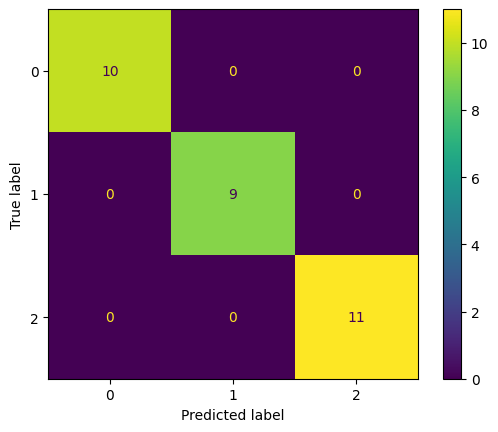

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

mat=ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [39]:
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for col in range(a[1]):
        if row == col: # correct predicted tp + tn
            corrPred +=cm[row][col]
        else:
            falsePred += cm[row][col]

print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(falsePred+corrPred))

Correct predictions:  30
False predictions 0


Accuracy of the Naive Bayes Clasification is:  1.0


In [40]:
tp=cm[0][0]
tn=cm[1][1]
fp=cm[1][0]
fn=cm[0][1]

print("Recall : ",tp/(tp+fn))
print("Precision : ",tp/(tp+fp))
print("Accuracy : ",(tp+tn)/(tp+tn+fp+fn))

Recall :  1.0
Precision :  1.0
Accuracy :  1.0
